Perform clustering on multiple clusters. Check using the silhouette coefficient  
http://archive.ics.uci.edu/ml/datasets/Grammatical+Facial+Expressions

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
from sklearn.preprocessing import StandardScaler 
warnings.filterwarnings("ignore")

# Data uploading 
df = pd.read_csv('a_affirmative_datapoints.txt', sep=' ', header=0)
df.head(5)

,0.0,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,1.390385e+09,244.672,208.182,895,240.949,205.708,890,235.994,205.018,883,...,923,283.559,186.549,944,291.722,189.204,0,296.547,192.722,1019
1,1.390385e+09,265.953,195.731,1016,262.556,193.301,1007,258.243,192.547,1001,...,1050,301.606,176.421,1069,308.776,180.199,0,312.501,184.498,0
2,1.390385e+09,272.755,192.786,1060,269.481,190.460,1056,265.371,189.756,1053,...,1097,307.299,174.126,1114,314.125,177.992,1140,317.529,182.324,1179
3,1.390385e+09,281.890,190.533,1129,278.861,188.023,1129,274.899,187.213,1136,...,1167,315.525,176.009,1187,322.016,180.029,0,325.041,184.442,1252
4,1.390385e+09,283.933,193.201,1159,280.955,190.877,1159,277.180,190.196,1167,...,1195,315.102,177.654,1216,321.384,181.259,1225,324.488,185.400,1284


In [9]:
 # Check for missing values
if df.isnull().sum().any():
    print("Missing values found. Replacing with column mean.")
    df.fillna(df.mean(), inplace=True)  

In [10]:
# Selecting numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
filtered_df = df[numeric_columns]

In [11]:
# Data Scaling
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(filtered_df)

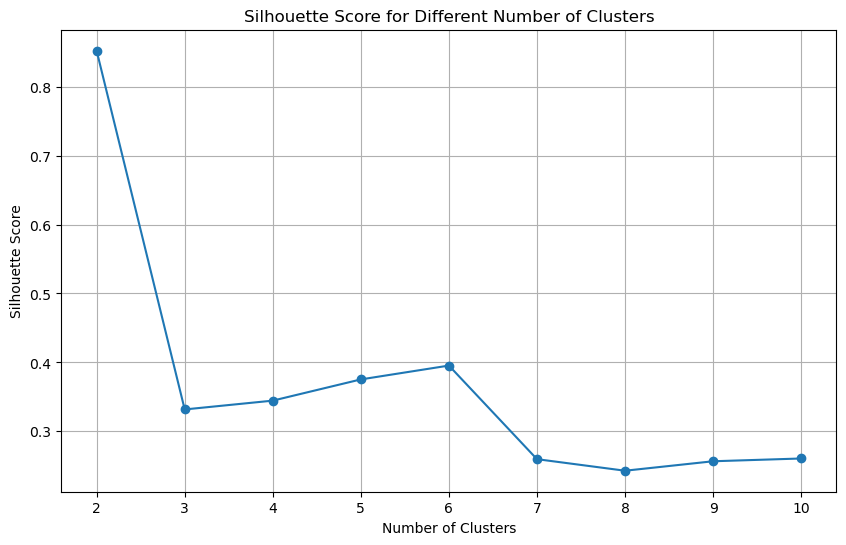

Optimal number of clusters: 2


In [12]:
# Clustering on multiple clusters
silhouette_scores = []
k_range = range(2, 11)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data) 
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette coefficient graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Choosing the optimal number of clusters
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

# Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data) 
filtered_df['Cluster'] = labels

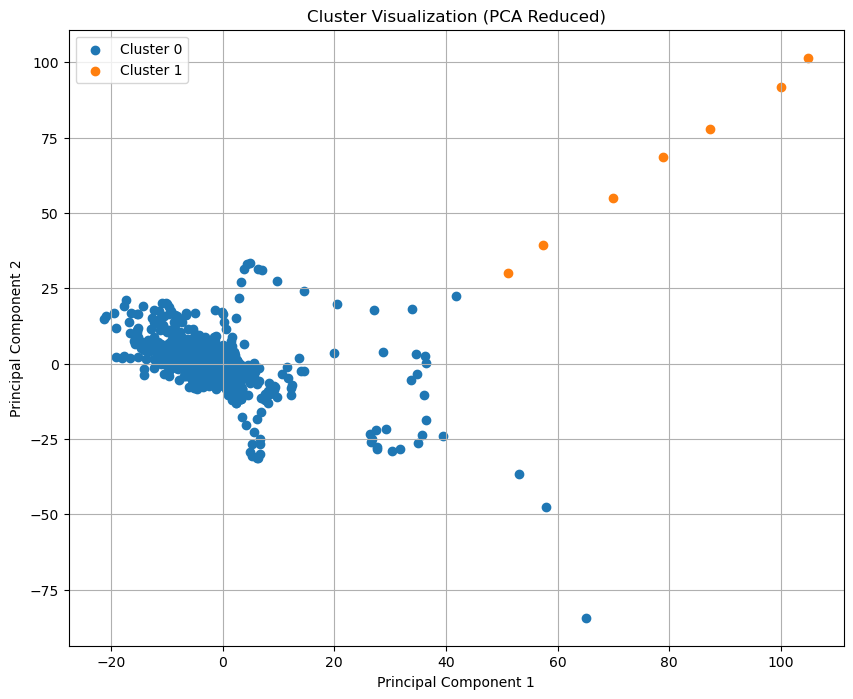

In [14]:
# Visualization of clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = reduced_data[filtered_df['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Cluster Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()